It is possible to perform PCA using neural networks using a model architecture called an autoencoder. An autoencoder is a neural network that is trained to copy its input to its output. This means that the input and the output number of neurons will be the same. However, the number of neurons in the hidden layer will be less than the number of neurons in the input layer. This forces the autoencoder to learn a compressed representation of the input data. The hidden layer is called the code or latent space.

The reason an autoencoder can be used to perform PCA is that the autoencoder will learn to reconstruct the input data from the code. If the code is smaller than the input data, then the autoencoder will be forced to learn a compressed representation of the input data. This is exactly what PCA does. If the input is a 3d feature vector and the code is a 2d feature vector, then the latent code with the most data despite the compression will be the projection of the original dataspace onto the vector that spans the first two principal components.

We will do this below with the iris dataset, using 3 of the four features for visualization purposes.

In [17]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the feature matrix (X) and target vector (y)
X = iris.data
X = X[:, :3] # Only use the first 3 features

y = iris.target

# Access the feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names: ", feature_names)
print("Target names: ", target_names)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


Here is plot of the 3d iris dataset:

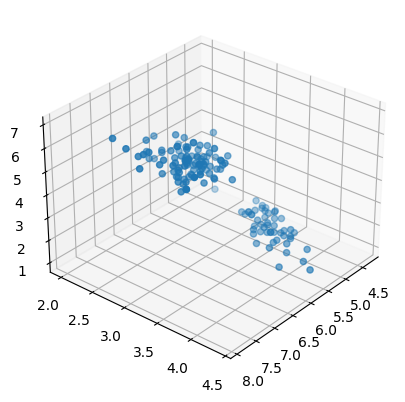

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Set viewing angle (elevation, azimuth)
ax.view_init(30, 400)


# Show the plot
plt.show()


Things to note about this autoencoder:

The input and output of the net are the same dimmension.   
  
There is no activation function. That is because this is a linear autoencoder. Meaning its weights will learn to perform a linear transformation on the input --> hidden --> output. This is exactly what PCA does. It finds the linear transformation that best preserves the variance in the data.

The loss function is mean squared error. This is the choice because it allows use to measure how different the input is from the output.

In [33]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])]) # 3D input-> 2D hidden
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])]) # 2D hidden -> 3D output

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))  

In [34]:
autoencoder.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 2)                 8         
                                                                 
 sequential_16 (Sequential)  (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Note, Because we want the input and the output to be the same, we are using the training examples as both the features and the targets. 

In [35]:
history = autoencoder.fit(X, X, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 10.7107
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1791
Epoch 3/100
5/5 [==============================] - 0s 996us/step - loss: 0.0902
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0495
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0427
Epoch 8/100
5/5 [==============================] - 0s 853us/step - loss: 0.0379
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 10/100
5/5 [==============================] - 0s 976us/step - loss: 0.0325
Epoch 11/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 12/100
5/5 [==============================] - 0s 975us/step - loss: 0.0289
Epoch 13/100
5/5 [==============================] - 

We can now predict with the encoder component of the net to see the compressed data. We can also predict with the entire net to see the reconstructed data.

In [39]:
compressed_X = encoder.predict(X)
print(f'shape of compressed_X: {compressed_X.shape}')

5/5 [==============================] - 0s 1ms/step
shape of compressed_X: (150, 2)


Let's plot the compressed X against an arial view of the original X.

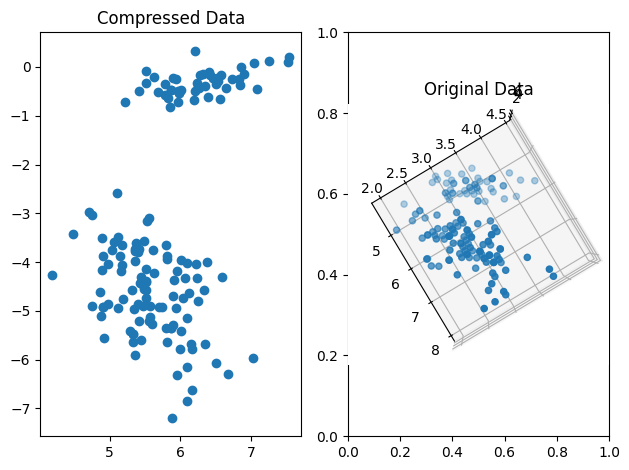

In [50]:
# Create a super figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the compressed data in 2 dimensions on the first subplot
ax1.scatter(compressed_X[:, 0], compressed_X[:, 1])
ax1.set_title('Compressed Data')

# Plot the original data in 3 dimensions on the second subplot
ax2 = fig.add_subplot(122, projection='3d')  # Specify the subplot location as (1, 2, 2)
ax2.scatter(X[:, 0], X[:, 1], X[:, 2])
ax2.set_title('Original Data')

# Set viewing angle (elevation, azimuth) for the second subplot
ax2.view_init(90, -30)

# Adjust spacing between subplots
plt.tight_layout()


plt.show()

Its possible to see here the the autoencoder has learned to project the data onto the plane that contains max variance. This is the plane that spans the first two principal components.